## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 2 - Notebook 8: Callbacks

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as keras_backend
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import numpy as np

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [ ]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# We won't save the weights and models for this notebook because
# generating them with different options is the whole point of 
# these demonstrations.

In [3]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

In [4]:
# Build our 2-layer MNIST model to demonstrate callbacks


random_seed = 42

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test 
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    return model

def make_compiled_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

In [5]:
# make the model
model = make_compiled_model()

# seed the random number generator
np.random.seed(random_seed)

# Make a checkpoint routine to save val_loss every 5th epoch

checkpoint_folder_name = 'NB08-checkpointed-models'
file_helper.check_for_directory(checkpoint_folder_name)
filename = checkpoint_folder_name+'/model-epoch-{epoch:03d}-val_loss-{val_loss:0.3f}.h5'
checkpointer = ModelCheckpoint(filename, monitor='acc', period=1) 

# call fit() to train the model, and save the history
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=2,
                    callbacks = [checkpointer] )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
3s - loss: 0.3001 - acc: 0.9147 - val_loss: 0.1590 - val_acc: 0.9537
Epoch 2/100
3s - loss: 0.1216 - acc: 0.9652 - val_loss: 0.1055 - val_acc: 0.9698
Epoch 3/100
3s - loss: 0.0801 - acc: 0.9772 - val_loss: 0.0803 - val_acc: 0.9744
Epoch 4/100
3s - loss: 0.0565 - acc: 0.9841 - val_loss: 0.0676 - val_acc: 0.9786
Epoch 5/100
3s - loss: 0.0421 - acc: 0.9880 - val_loss: 0.0667 - val_acc: 0.9790
Epoch 6/100
3s - loss: 0.0316 - acc: 0.9914 - val_loss: 0.0600 - val_acc: 0.9806
Epoch 7/100
3s - loss: 0.0236 - acc: 0.9940 - val_loss: 0.0569 - val_acc: 0.9814
Epoch 8/100
3s - loss: 0.0185 - acc: 0.9959 - val_loss: 0.0642 - val_acc: 0.9807
Epoch 9/100
3s - loss: 0.0143 - acc: 0.9969 - val_loss: 0.0588 - val_acc: 0.9821
Epoch 10/100
3s - loss: 0.0111 - acc: 0.9976 - val_loss: 0.0592 - val_acc: 0.9822
Epoch 11/100
3s - loss: 0.0074 - acc: 0.9990 - val_loss: 0.0622 - val_acc: 0.9812
Epoch 12/100
3s - loss: 0.0063 - acc: 0.9991 - val_loss: 

In [6]:
# make the model
model = make_compiled_model()

# Make a checkpoint routine to save val_loss every 5th epoch
filename = checkpoint_folder_name+'/model-weights-epoch-{epoch:03d}-acc-{acc:0.3f}.h5'
checkpointer = ModelCheckpoint(filename, monitor='acc', save_weights_only=True, period=10) 

# call fit() to train the model, and save the history
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=2,
                    callbacks = [checkpointer] )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
3s - loss: 0.3010 - acc: 0.9151 - val_loss: 0.1569 - val_acc: 0.9536
Epoch 2/100
3s - loss: 0.1221 - acc: 0.9652 - val_loss: 0.1039 - val_acc: 0.9686
Epoch 3/100
3s - loss: 0.0779 - acc: 0.9781 - val_loss: 0.0830 - val_acc: 0.9738
Epoch 4/100
3s - loss: 0.0569 - acc: 0.9837 - val_loss: 0.0778 - val_acc: 0.9761
Epoch 5/100
3s - loss: 0.0425 - acc: 0.9877 - val_loss: 0.0670 - val_acc: 0.9788
Epoch 6/100
3s - loss: 0.0321 - acc: 0.9913 - val_loss: 0.0676 - val_acc: 0.9788
Epoch 7/100
3s - loss: 0.0240 - acc: 0.9939 - val_loss: 0.0595 - val_acc: 0.9815
Epoch 8/100
3s - loss: 0.0182 - acc: 0.9958 - val_loss: 0.0592 - val_acc: 0.9818
Epoch 9/100
3s - loss: 0.0137 - acc: 0.9969 - val_loss: 0.0617 - val_acc: 0.9814
Epoch 10/100
3s - loss: 0.0112 - acc: 0.9979 - val_loss: 0.0599 - val_acc: 0.9813
Epoch 11/100
3s - loss: 0.0085 - acc: 0.9986 - val_loss: 0.0626 - val_acc: 0.9811
Epoch 12/100
3s - loss: 0.0059 - acc: 0.9992 - val_loss: 

In [7]:
# modify the learning rate over time with a callback
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD

# make the model but don't compile it
model = make_model()

sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

def simpleSchedule(epoch_number):
    return max(.1, 1-(0.01*epoch_number)) # start at 1 & drop to 0.1

lr_scheduler = LearningRateScheduler(simpleSchedule)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=256, verbose=2,
                    callbacks=[lr_scheduler])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
2s - loss: 0.0457 - acc: 0.9846 - val_loss: 0.0219 - val_acc: 0.9927
Epoch 2/100
2s - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0161 - val_acc: 0.9945
Epoch 3/100
2s - loss: 0.0119 - acc: 0.9961 - val_loss: 0.0130 - val_acc: 0.9955
Epoch 4/100
2s - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0132 - val_acc: 0.9954
Epoch 5/100
2s - loss: 0.0062 - acc: 0.9982 - val_loss: 0.0110 - val_acc: 0.9959
Epoch 6/100
2s - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0103 - val_acc: 0.9965
Epoch 7/100
2s - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0101 - val_acc: 0.9965
Epoch 8/100
2s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0107 - val_acc: 0.9963
Epoch 9/100
2s - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0102 - val_acc: 0.9965
Epoch 10/100
2s - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0102 - val_acc: 0.9966
Epoch 11/100
2s - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0096 - val_acc: 0.9966
Epoch 12/100
2s - loss: 7.6968e-04 - acc: 0.9999 - val_lo

In [8]:
# stop when the validation loss starts going back up
from keras.callbacks import EarlyStopping

# make the model
model = make_compiled_model()

early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=256, verbose=2,
                    callbacks=[early_stopper])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
3s - loss: 0.2980 - acc: 0.9167 - val_loss: 0.1504 - val_acc: 0.9554
Epoch 2/100
3s - loss: 0.1186 - acc: 0.9661 - val_loss: 0.1054 - val_acc: 0.9685
Epoch 3/100
3s - loss: 0.0786 - acc: 0.9772 - val_loss: 0.0860 - val_acc: 0.9730
Epoch 4/100
3s - loss: 0.0565 - acc: 0.9836 - val_loss: 0.0693 - val_acc: 0.9779
Epoch 5/100
3s - loss: 0.0410 - acc: 0.9883 - val_loss: 0.0737 - val_acc: 0.9767
Epoch 6/100
3s - loss: 0.0312 - acc: 0.9916 - val_loss: 0.0644 - val_acc: 0.9781
Epoch 7/100
3s - loss: 0.0236 - acc: 0.9942 - val_loss: 0.0612 - val_acc: 0.9815
Epoch 8/100
3s - loss: 0.0185 - acc: 0.9958 - val_loss: 0.0593 - val_acc: 0.9822
Epoch 9/100
3s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0639 - val_acc: 0.9824
Epoch 10/100
3s - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0591 - val_acc: 0.9830
Epoch 11/100
3s - loss: 0.0079 - acc: 0.9987 - val_loss: 0.0590 - val_acc: 0.9827
Epoch 12/100
3s - loss: 0.0064 - acc: 0.9990 - val_loss: 

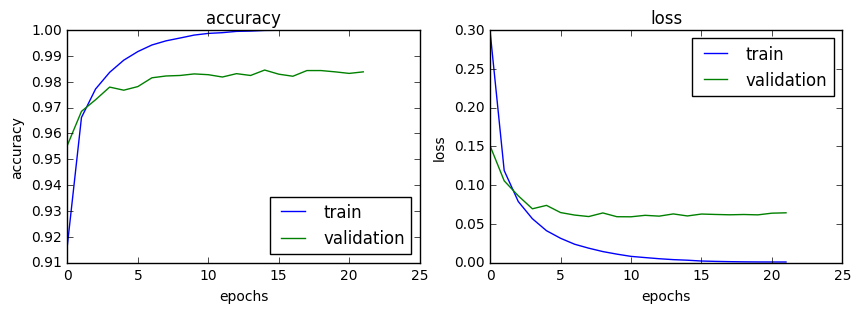

In [9]:
xs = range(len(history.history['acc']))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(xs, history.history['acc'], label='train')
plt.plot(xs, history.history['val_acc'], label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')

plt.subplot(1, 2, 2)
plt.plot(xs, history.history['loss'], label='train')
plt.plot(xs, history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')

file_helper.save_figure('early-stopping-demo')
plt.show()